# Data Analysis
In this specific notebook we will test our ```omega_simulate``` script to run trading simulations. 

We will combine that script with our other ```omega_analysis``` script to further analysis the distribution.

We are essentially looking for an ideal **threshold** measure along with **fair distribution** that is optimized at bringing returns. 

The reason for this is because we want our CNN to learn a good distribution, one which will create patterns enough for the eye to detect. 

In [1]:
from omega_simulate import *
# from omega_analysis import *
import os
import matplotlib.pyplot as plt

In [2]:
# filtering warning for testing
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [3]:
# importing our changes df
path = './post_processing/data_fluc/changes_1hr_USDGBP.csv'
changes_df = pd.read_csv(path)

## Distributions to test
We will test the following distributions: 

**Prediction Windows**
* 3hrs
* 6hrs
* 12hrs
* 24hrs
* 36hrs
* 48hrs

**Buy Thresholds**
* .002
* .005
* .01
* .02

**Sell Thresholds**
* 0.0
* -0.002
* -0.005
* -0.01
* -0.02

In [4]:
# Distributuons to test dict
test_dist = {
    'prediction_window': [3, 6, 12, 24, 36, 48],
    'buy_threshold': [0.002, 0.005, 0.01, 0.02],
    'sell_threshold': [0.0, -0.002, -0.005, -0.01, -0.02]
}

## Helper Function
We will create a quick helper function which will wrap around ```omega_simulate``` adding onto what is returned. This wrapper function will call the script directory and also return a histrogram along with frequency of trade with the given ```buy_threshold``` and ```sell_threshold```. 

This will allow for us to better analysis the trades and distribution without rewriting much code

In [5]:
# helper function
def analyze_distribution(sequence, buy_threshold, sell_threshold, start_cap, margin_trade=False, print_trades=False):
    # checking for margin trading
    if margin_trade:
        simulate_thresh_test_trade(sequence, buy_threshold, sell_threshold, start_cap, margin_trade=True, print_trades=False)
        
        # printing trades?
        if print_trades:
            simulate_thresh_test_trade(sequence, buy_threshold, sell_threshold, start_cap, margin_trade=True, print_trades=True)
    
    # printing trades?
    if print_trades:
        simulate_thresh_test_trade(sequence, buy_threshold, sell_threshold, start_cap, print_trades=True)
    
    # calling our simulation test - without margin trading and no print trading
    simulate_thresh_test_trade(sequence, buy_threshold, sell_threshold, start_cap, print_trades=False)
    
    # plotting our histrogram
    # grabbing our window size
    window_size = sequence.columns[2]
    
    try:
        plt.hist(sequence[window_size], bins=750, range=(-0.015, 0.015))
        plt.plot()
    except Exception:
        pass
    
def get_sequence(df_, window):
    """
    Getting our sequence provides the window
    """
    columns = ['open', 'close', str(window)]
    return df_[columns].copy()

# Testing

In [6]:
test_dist

{'prediction_window': [3, 6, 12, 24, 36, 48],
 'buy_threshold': [0.002, 0.005, 0.01, 0.02],
 'sell_threshold': [0.0, -0.002, -0.005, -0.01, -0.02]}

Starting capital: 100000
Ending capital: 103670.51706
Return on investment: 3%
Total Transaction cost: 32.67089


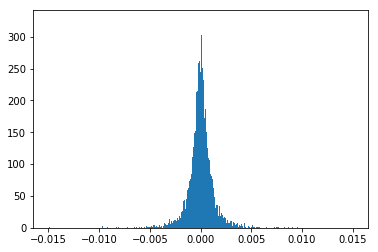

In [7]:
"""
Test A:
    Window = 3
    buy threshold = 0.01
    sell threshold = 0.01
    starting capital = 100000
"""

# our parameters: CHANGE THESE
window = 3
buy = 0.01
sell = 0.01
starting_cap = 100000

### ---------------TESTING-------------------###
# grabbing our sequence
sequence_ = get_sequence(changes_df, window)

# running our test
analyze_distribution(sequence_, buy, sell, starting_cap, print_trades=False)